In [1]:
import csv
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import RandomizedSearchCV
from sklearn.grid_search import GridSearchCV
from sklearn import svm
from sklearn.cross_validation import train_test_split
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
import numpy as np
import time

df_ed = pd.read_csv('D:\OneDrive\\4.semester\OZNAL\Train.csv')

c:\python27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\python27\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
df_ed = pd.get_dummies(df_ed)
cols = list(df_ed.columns.values) #Make a list of all of the columns in the df

df_ed = df_ed[df_ed['SalaryNormalized'] < 100000] #remove long tail
cols.pop(cols.index('SalaryNormalized')) #Remove b from list
df_ed = df_ed[cols+['SalaryNormalized']] #Create new dataframe with columns in the order you want

df_x=df_ed.iloc[:,0:57]
df_y=df_ed.iloc[:,57]

In [3]:
#CREATE TEST AND TRAING DATA###################
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.2,random_state=4)
x_train,x_test,y_train,y_test = train_test_split(x_test,y_test,test_size=0.2,random_state=4)

##Logistic regression###########
# rf =LogisticRegression()
# rf.fit(x_train,y_train)
################################


#TUNING RANDOM FOREST#########################
# params = {"n_estimators": np.arange(10, 80, 5),
#           "max_depth": np.arange(4, 12, 1),
#           "min_samples_leaf": np.arange(1, 10, 1),
#           "min_samples_split": np.arange(2, 6, 1),
#          "max_features": ["auto","sqrt","log2"]}

# model = RandomForestRegressor()
# grid = RandomizedSearchCV(model, params,verbose=10,n_jobs=3,n_iter=20)
# start = time.time()
# grid.fit(x_train,y_train)
 
# print("[INFO] randomized search took {:.2f} seconds".format(
# 	time.time() - start))
# acc = grid.score(x_test,y_test)
# print("[INFO] grid search accuracy: {:.2f}%".format(acc * 100))
# print("[INFO] randomized search best parameters: {}".format(
# 	grid.best_params_))

#TUNING#########################

##RANDOM FOREST#########################
rf1=RandomForestRegressor(n_estimators=65,max_depth=11, max_features='auto', min_samples_leaf=3,min_samples_split=5)
rf1.fit(x_train,y_train)
# print(rf.feature_importances_)
##RANDOM FOREST#########################


#TUNING GB BOOST#########################
# params = {"n_estimators": np.arange(60, 80, 5),
#           "max_depth": np.arange(6, 8, 1),
#           "min_samples_leaf": np.arange(5, 10, 1),
#           "min_samples_split": np.arange(5, 7, 1),
#           "loss": ["huber"],
#           "alpha":  [0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7]}

# model = GradientBoostingRegressor()
# grid = RandomizedSearchCV(model, params,verbose=10,n_jobs=3,n_iter=20)
# start = time.time()
# grid.fit(x_train,y_train)
 
# print("[INFO] randomized search took {:.2f} seconds".format(
# 	time.time() - start))
# acc = grid.score(x_test,y_test)
# print("[INFO] grid search accuracy: {:.2f}%".format(acc * 100))
# print("[INFO] randomized search best parameters: {}".format(
# 	grid.best_params_))

#TUNING#########################


##GD BOOST#########################
rf2=GradientBoostingRegressor(n_estimators=65,loss ='huber', max_depth=8, min_samples_split=6, min_samples_leaf=7, alpha=0.55)
rf2.fit(x_train,y_train)
##GD BOOST#########################


#DATA NORMALIZATION FOR MLP AND SVM#########################
# print "Starting Transformation"
# scaler = StandardScaler()  
# # Don't cheat - fit only on training data
# scaler.fit(x_train)  
# x_train = scaler.transform(x_train)  
# print "Train data transformed"
# # apply same transformation to test data
# x_test = scaler.transform(x_test)
# print "Test data transformed"
###################################################

#TUNING MPL Neural Network#########################
# params = {"activation": ["identity", "logistic", "tanh", "relu"],
#           "solver" : ["lbfgs", "sgd", "adam"],
#           "max_iter": np.arange(200, 300, 20),
#           "hidden_layer_sizes": [(50,100,100,50)]}

# model =  MLPRegressor()
# grid = RandomizedSearchCV(model, params,verbose=10,n_jobs=3,n_iter=20)
# start = time.time()
# grid.fit(x_train,y_train)
 
# print("[INFO] randomized search took {:.2f} seconds".format(
# 	time.time() - start))
# acc = grid.score(x_test,y_test)
# print("[INFO] grid search accuracy: {:.2f}%".format(acc * 100))
# print("[INFO] randomized search best parameters: {}".format(
# 	grid.best_params_))

#TUNING#########################

##MPL Neural Network#########################
rf3 = MLPRegressor(hidden_layer_sizes=(20, 60, 10, 60))   # neuronova siet  dava zle vysledky lebo features nei su skalovanie 0...1
rf3.fit(x_train,y_train)
##MPL Neural Network#########################

##SVM#########################
# rf=svm.SVR()
# rf.fit(x_train,y_train) # dava zle vysledky lebo features nei su skalovanie 0...1
##SVM#########################


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 60, 10, 60), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [31]:
#EVAULATION FOR SING METHOD
start = 0
diff = 0
base = 1000
distribution = []

t = y_test.values
print len(x_test)

for i in range (0,(len(x_test)/base) + 1):
    print i
    if start+base < len(x_test):
        prediction = rf.predict(x_test[start:start+base])
    else:
        prediction = rf.predict(x_test[start:len(x_test)])
        
    for i in range(len(prediction)):
        diff = diff + abs(prediction[i] - t[i+start])
        if t[i+start] - prediction[i] > 0:
            if ((t[i+start] - prediction[i])/(t[i+start])) * 100 * (-1) > -200:
                distribution.append(((t[i+start] - prediction[i])/(t[i+start])) * 100 * (-1))
        else:
            if ((prediction[i] - t[i+start])/(t[i+start])) * 100 < 200:
                distribution.append(((prediction[i] - t[i+start])/(t[i+start])) * 100)
    start = start + base
        
print diff/float((len(x_test)))

9754
0
1
2
3
4
5
6
7
8
9
6201.46712221


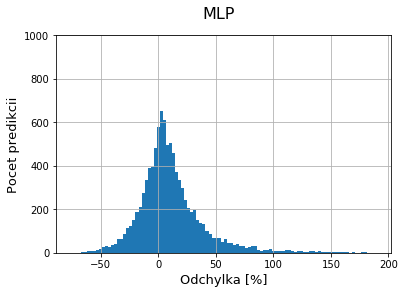

In [32]:
import matplotlib.pyplot as plt
plt.hist(distribution,bins=100)
plt.suptitle('MLP', fontsize=16)
plt.xlabel('Odchylka [%]', fontsize=13)
plt.ylabel('Pocet predikcii', fontsize=13)
plt.grid(True)
plt.ylim(0, 1000)
plt.show()

In [9]:
#EVAULATION FOR MULTIPLE ENSABLEMENTED METHODS

start = 0
diff = 0
base = 1000
distribution = []

#rf1 5701 RF 
#rf2 5460  GD
#rf3 5975  MLP
t = y_test.values
print len(x_test)

for i in range (0,(len(x_test)/base) + 1):
    print i
    if start+base < len(x_test):
        prediction1 = rf1.predict(x_test[start:start+base])
        prediction2 = rf2.predict(x_test[start:start+base])
        prediction3 = rf3.predict(x_test[start:start+base])
    else:
        prediction1 = rf1.predict(x_test[start:len(x_test)])
        prediction2 = rf2.predict(x_test[start:len(x_test)])
        prediction3 = rf3.predict(x_test[start:len(x_test)]) 
    
    for i in range(len(prediction1)):
        final_prediction = (prediction1[i] /5701) + (prediction2[i] /5460) + (prediction3[i]/5975)
        final_prediction = final_prediction / (1/float(5701) + 1/float(5460) + 1/float(5975))
        
        diff = diff + abs(final_prediction - t[i+start])
        if t[i+start] - final_prediction > 0:
            if ((t[i+start] - final_prediction)/(t[i+start])) * 100 * (-1) > -200:
                distribution.append(((t[i+start] - final_prediction)/(t[i+start])) * 100 * (-1))
        else:
            if ((final_prediction - t[i+start])/(t[i+start])) * 100 < 200:
                distribution.append(((final_prediction - t[i+start])/(t[i+start])) * 100)
    start = start + base
        
print diff/float((len(x_test)))

9754
0
1
2
3
4
5
6
7
8
9
5565.75505972
